<a href="https://colab.research.google.com/github/Thavisha72/Unemployment_Analysis_with_Python-TASK_02-/blob/main/Unemployment_Analysis_with_Python(TASK_02).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unemployment Analysis with Python


Contribution - Individual

Name - K G Thavisha Nipun Bandara

Assosiate -  CodeAlpha


# Project Summery

**Objective**

The goal of this project is to analyze unemployment trends and patterns using historical data. By examining unemployment rates across different regions, time periods, and demographics, we aim to understand the impact of events like Covid-19 and predict future trends.

**Scope**

 1) Analyze unemployment rates over time.

 2) Identify regions or demographics with high unemployment.

 3) Visualize trends and correlations through data visualization.

**Tools & Technologies**

 1) Python

 2) Google Colab for execution and visualization

Key Steps:

 1) Data Collection: Import unemployment datasets from government or open data sources.

 2) Data pre Processing: Handle missing data, duplicates, and inconsistencies.

 3) Data Analysis (EDA): Visualize trends, plot unemployment rates, and perform regional comparisons.


**Outcome**

The project is of significant importance due to the pressing need to address unemployment concerns caused by the COVID-19 pandemic. The insights gained from this analysis can empower policymakers and stakeholders to make informed decisions, implement interventions, and develop strategies for economic recovery.

#Step 01 - Identyfing Data

## Import Libraries

In [ ]:

# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import the 'calendar' and 'datetime' module
import calendar
import datetime as dt

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import data set

In [ ]:
#Load data set
df = pd.read_csv("https://raw.githubusercontent.com/Thavisha72/Unemployment_Analysis_with_Python-TASK_02-/refs/heads/main/Unemployment%20in%20India.csv")

## First View of the data set

In [ ]:
#top 5 rows of the data set
df.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## Rows,columns & Information

In [ ]:
#Rows count
print("Number of rows = ",df.shape[0])

#columns Count
print("Number of columns = ",df.shape[1])

print("-" * 100)
#dataset information
df.info()

Number of rows =  768
Number of columns =  7
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


## Duplicate values

In [ ]:
#Duplicate values

print("Duplicate values",df.duplicated().sum())

Duplicate values 27


## Missing values

In [ ]:
#Duplicate values
print("Missing values",df.isnull().sum())

Missing values Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


#Step 02 - Variables

In [ ]:
#printing columns

print(df.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [ ]:
#Describing the data set

df.describe(include= 'all').round(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.00,740.00,740.00,740
unique,28,14,2,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.79,7204460.03,42.63,NaN
std,NaN,NaN,NaN,10.72,8087988.43,8.11,NaN
min,NaN,NaN,NaN,0.00,49420.00,13.33,NaN
25%,NaN,NaN,NaN,4.66,1190404.50,38.06,NaN
50%,NaN,NaN,NaN,8.35,4744178.50,41.16,NaN
75%,NaN,NaN,NaN,15.89,11275489.50,45.50,NaN


#Step 03 - Data Preprossecing

In [ ]:
# changing column names
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate',
       'Region']

#convert Frequancy column to categorical data type
df['Frequency'] = df['Frequency'].astype('category')

#convert Region column to categorical data type
df['Region'] = df['Region'].astype('category')

In [ ]:
# Convert the Date column to datetime format, specifying 'dayfirst' to handle date formats with day first
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract the month from the Date column and create a new 'Month' column
df['Month'] = df['Date'].dt.month

# Create a new 'Month_int' column by converting the 'Month' column to integers, handling missing values
df['Month_int'] = df['Month'].apply(lambda x: int(x) if pd.notna(x) else x)


#deleting the Month column from data frame
#df.drop('Month', inplace= True)

print(df.columns)

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'Month', 'Month_int'],
      dtype='object')


In [ ]:
#deleting the Month column from data frame
df.drop(columns='Month', inplace=True)

In [ ]:
#data cleaning
#removing duplicates
df = df.drop_duplicates()
print("Duplicate values",(df.duplicated().sum()))

#drpping missing values
df = df.dropna()
print("Missing values",(df.isnull().sum()))


Duplicate values 0
Missing values States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
Month_int                              0
dtype: int64


In [ ]:
#get a copy of the data set for the during lockdown
df_dl = df.copy()

In [ ]:
#defining the Time range of the before lockdown
mask = (df['Date'] >= '2019-05-31') & (df['Date'] <= '2020-03-31')
df = df.loc[mask]

In [ ]:
#defining the Time range of the during lockdown
mask = (df_dl['Date'] >= '2020-04-30')
df_dl = df_dl.loc[mask]

# Data Visualisation

##Chart 1 -Region wise unemployed rate before and during lockdown.


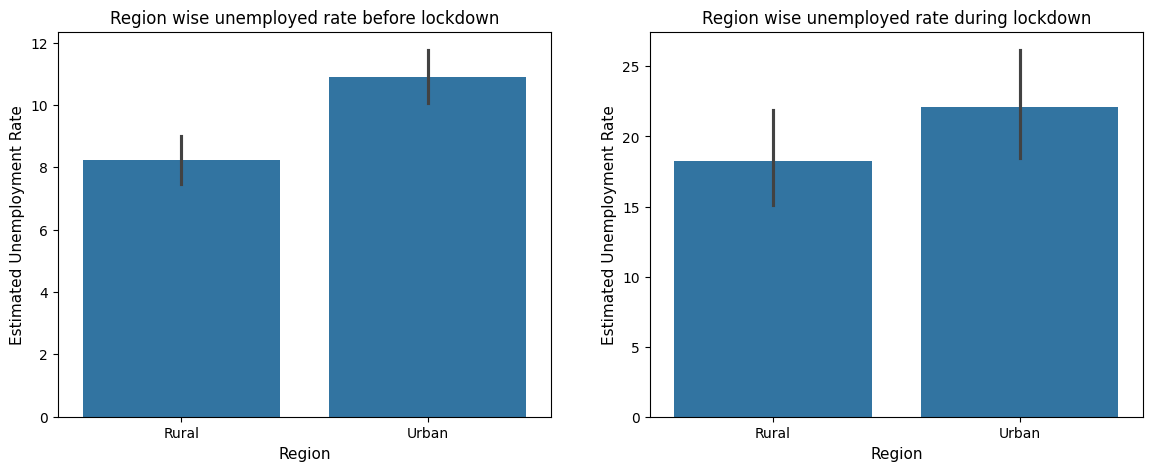

In [ ]:
#region wise unemployed rate before and during lockdown

#size of figeres
plt.figure(figsize = (14,5))

# barplot 01 - region wise unemployed rate before lockdown
plt.subplot(1,2,1)

sns.barplot(x = 'Region',y ='Estimated Unemployment Rate' , data = df )

#title of the plot
plt.title('Region wise unemployed rate before lockdown')
#labels
plt.xlabel("Region", fontsize=11)
plt.ylabel("Estimated Unemployment Rate",fontsize=11)

# barplot 02 - region wise unemployed rate during lockdown

plt.subplot(1,2,2)

sns.barplot(x = 'Region',y ='Estimated Unemployment Rate' , data = df_dl)

#title of the plot
plt.title('Region wise unemployed rate during lockdown')
#labels
plt.xlabel("Region", fontsize=11)
plt.ylabel("Estimated Unemployment Rate",fontsize=11)

plt.show()

### Information Found from chart 1

The The Labour Partipation Rate is Much higher Before Lockdown compared to the during the Lockdown.

## Chart 2 : Bar Plot for State Wise Estimated Unemployment Rate


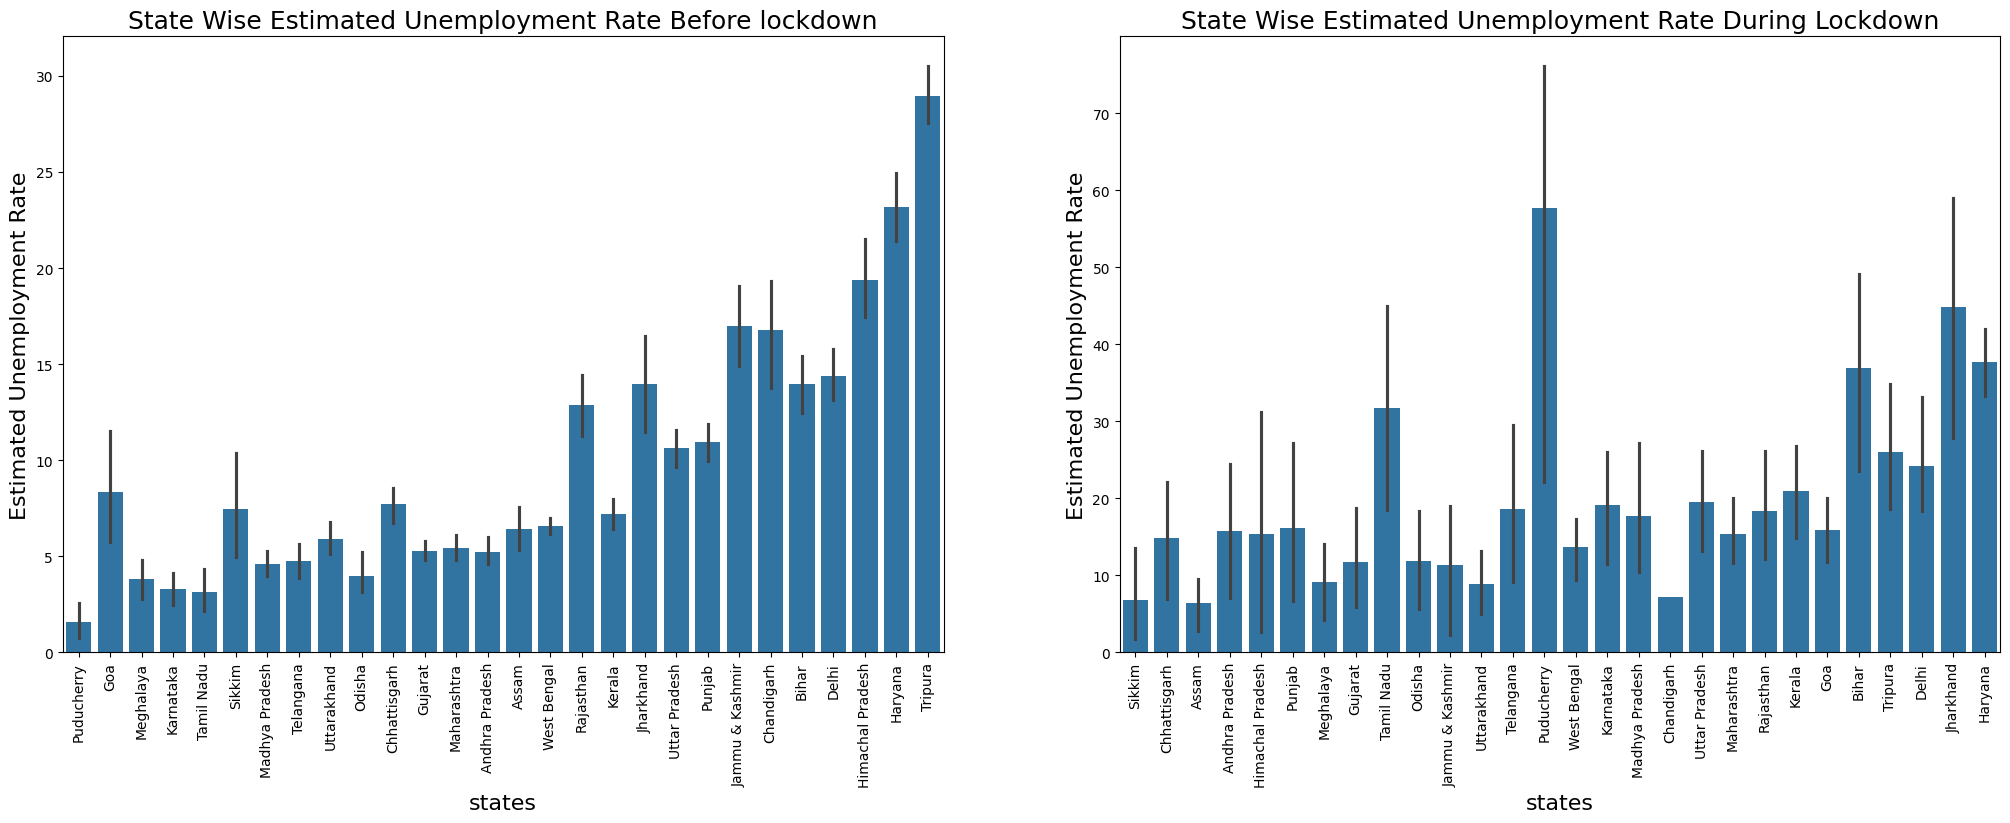

In [ ]:
#Bar Plot for State Wise Estimated Unemployment Rate

plt.figure(figsize=(25,8))
plt.subplot(1,2,1)

#title
plt.title('State Wise Estimated Unemployment Rate Before lockdown',fontsize=18)
sns.barplot(data=df.sort_values(by='Estimated Unemployment Rate',ascending=True) , x = 'States', y ='Estimated Unemployment Rate')
#labels
plt.xlabel('states',fontsize=16)
plt.ylabel('Estimated Unemployment Rate',fontsize=16)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
#title
plt.title('State Wise Estimated Unemployment Rate During Lockdown',fontsize=18)
sns.barplot(data=df_dl.sort_values(by='Estimated Unemployment Rate',ascending=True) , x = 'States', y ='Estimated Unemployment Rate')
#labels
plt.xlabel('states',fontsize=16)
plt.ylabel('Estimated Unemployment Rate',fontsize=16)
plt.xticks(rotation=90)

plt.show()

### Information found from chart 2

Avove barcharts shows that the Estimated unemployed rate is high in states like Tripura, Haryana , Himachal Pradesh Before Lockdown . and the Estimated Unemployed rate is high in states like Pudducherry , Jharkhand , Haryana During the lockdown.

## Chart 3 - State and Region wise Estimated Employed Workforce

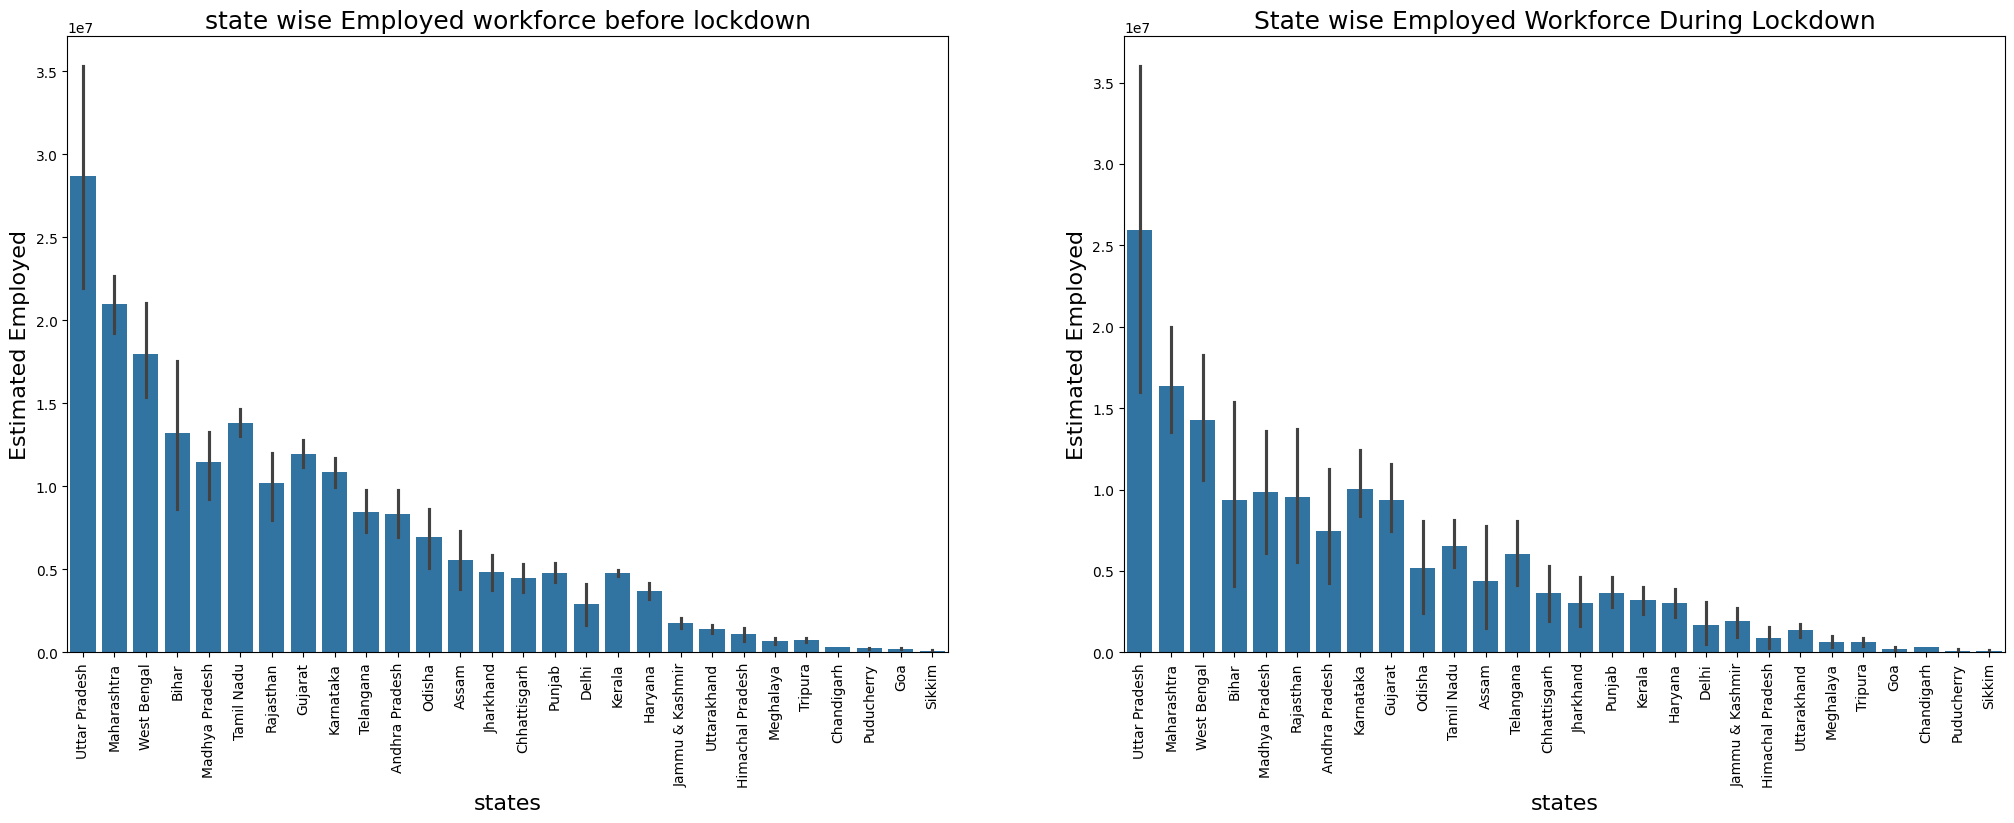

In [ ]:
#Chart 3 - State wise Estimated Employed Workforce

plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
#plot State wise Estimated Employed Workforce before lockdown
sns.barplot(data=df.sort_values(by='Estimated Employed',ascending=False) , x = 'States', y ='Estimated Employed')
#title
plt.title('state wise Employed workforce before lockdown',fontsize=18)
#labels
plt.xlabel('states',fontsize=16)
plt.ylabel('Estimated Employed',fontsize=16)
plt.xticks(rotation=90)

#plot State wise Estimated Employed Workforce during lockdown
plt.subplot(1,2,2)
sns.barplot(data=df_dl.sort_values(by='Estimated Employed',ascending=False) , x = 'States' , y ='Estimated Employed')
#title
plt.title('State wise Employed Workforce During Lockdown',fontsize=18)
#labels
plt.xlabel('states',fontsize=16)
plt.ylabel('Estimated Employed',fontsize=16)
plt.xticks(rotation=90)

plt.show()

### Information found from chart 3

About barchart shows that the Employed workforce in Uttar Pradesh Maharashta and West Bengal are in top Before the Lockdown. And also it remains the same three states are in top during the Lockdown.

## Chart 4 - Estimated labour Participation Rate

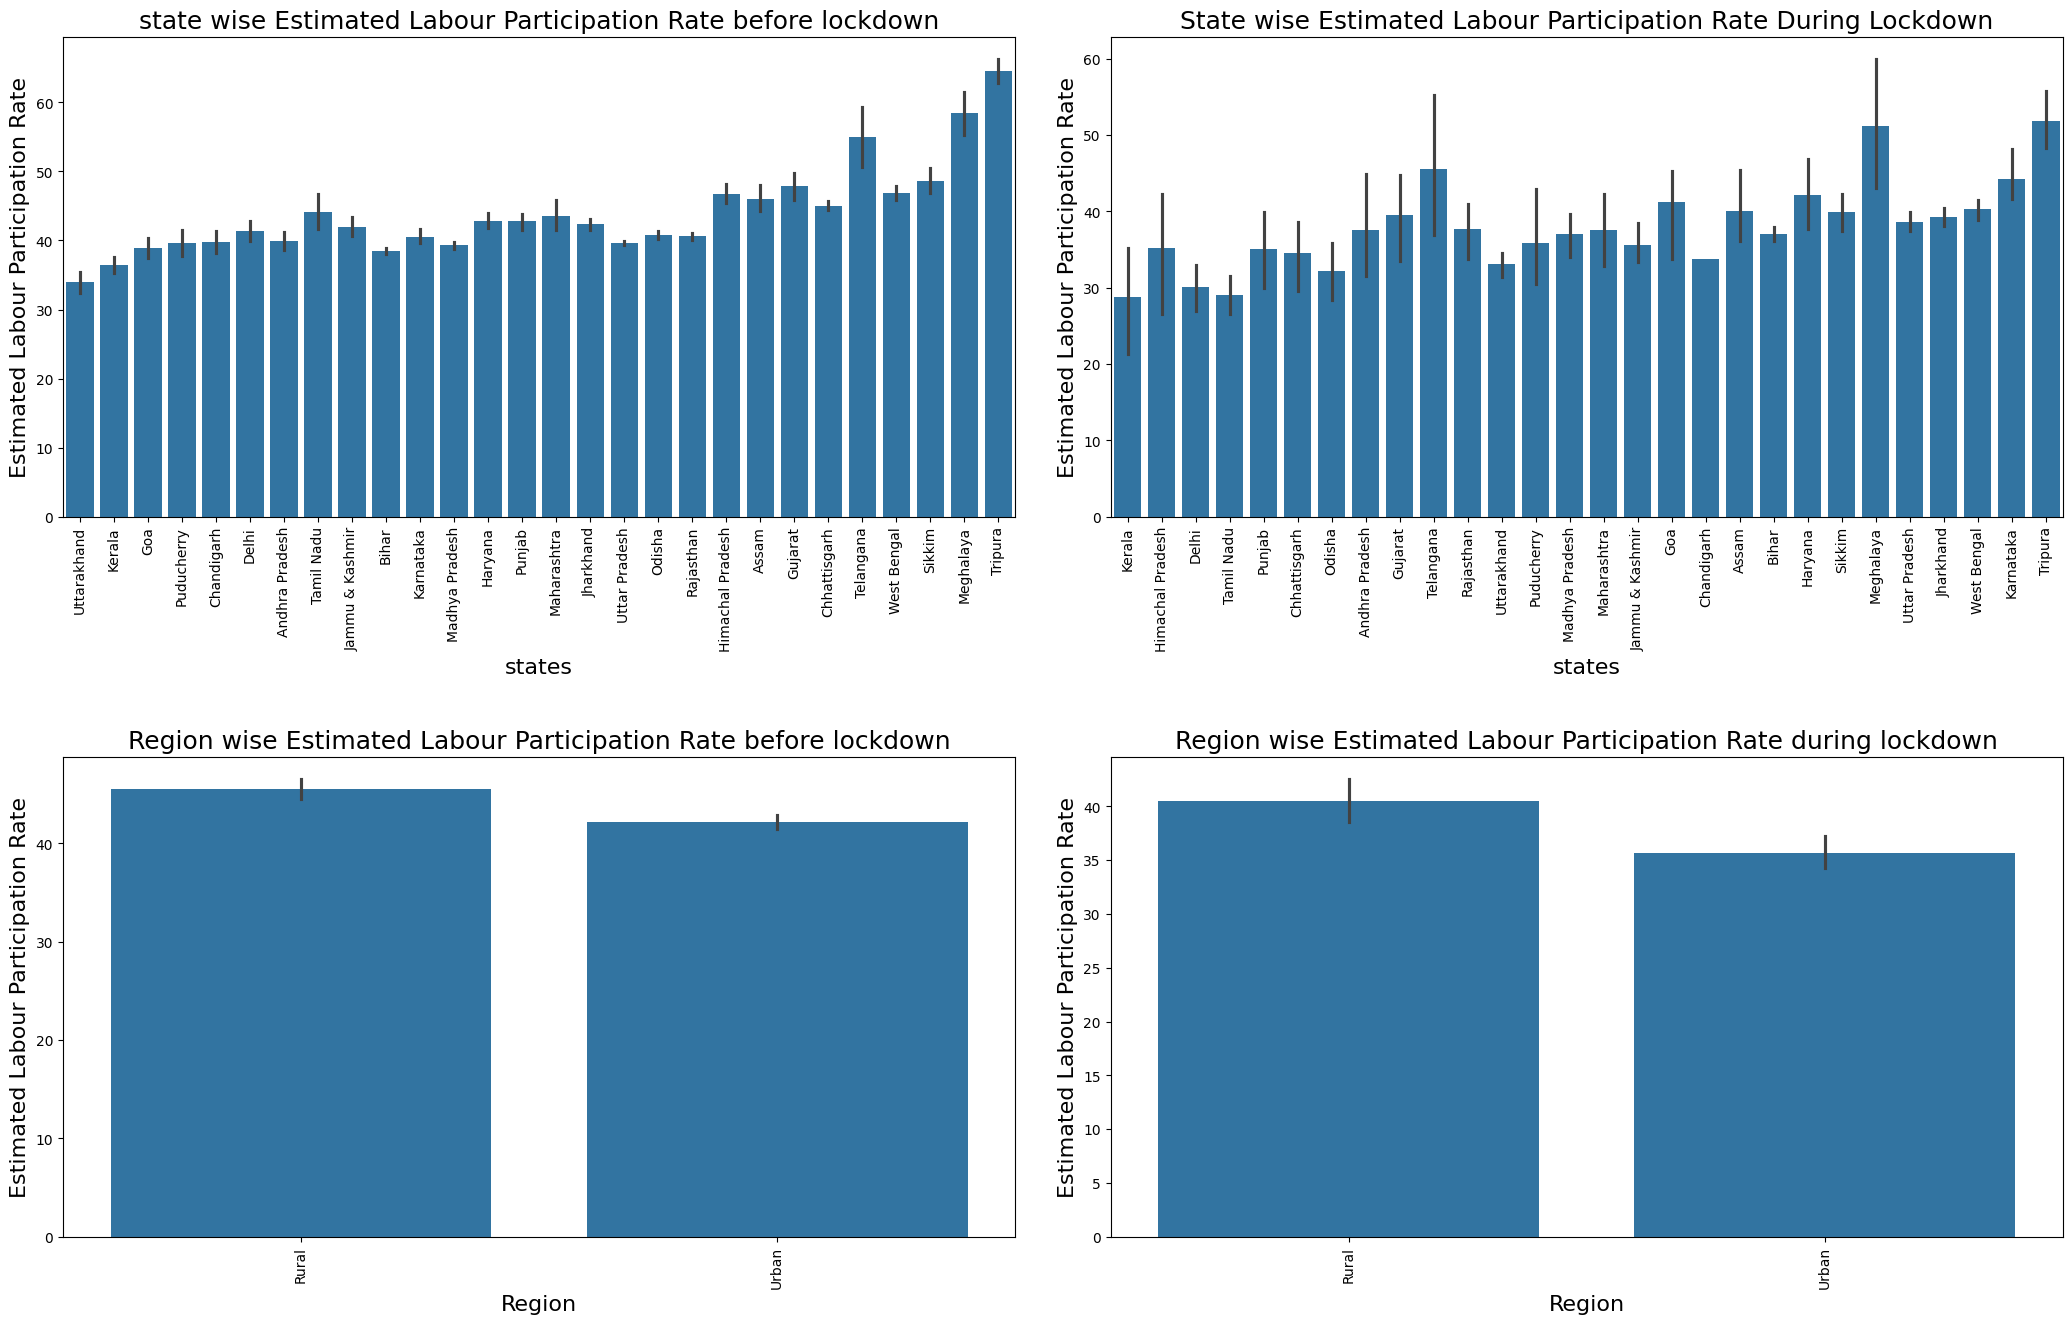

In [ ]:
#Estimated labour Participation Rate state wise

plt.figure(figsize=(25,8))
plt.subplot(2,2,1)
#Plot for state wise Estimated Labour Participation Rate before Lockdown
sns.barplot(data=df.sort_values(by='Estimated Labour Participation Rate',ascending=True) , x = 'States', y ='Estimated Labour Participation Rate')
#title
plt.title('state wise Estimated Labour Participation Rate before lockdown',fontsize=18)
#labels
plt.xlabel('states',fontsize=16)
plt.ylabel('Estimated Labour Participation Rate',fontsize=16)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
#Plot for State wise Estimated Labour Participation Rate During Lockdown
sns.barplot(data=df_dl.sort_values(by='Estimated Labour Participation Rate',ascending=True) , x = 'States', y ='Estimated Labour Participation Rate')
#title
plt.title('State wise Estimated Labour Participation Rate During Lockdown',fontsize=18)
#labels
plt.xlabel('states',fontsize=16)
plt.ylabel('Estimated Labour Participation Rate',fontsize=16)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
#Region wise Estimated Labour Participation Rate before Lockdown
sns.barplot(data=df.sort_values(by='Estimated Labour Participation Rate',ascending=True), x = 'Region', y ='Estimated Labour Participation Rate')
#title
plt.title('Region wise Estimated Labour Participation Rate before lockdown',fontsize=18)
#labels
plt.xlabel('Region',fontsize=16)
plt.ylabel('Estimated Labour Participation Rate',fontsize=16)
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, right=0.9,top=3.0, bottom=1.5,wspace=0.4, hspace=0.4)

plt.subplot(2,2,4)
#Region wise Estimated Labour Participation Rate before Lockdown
sns.barplot(data=df_dl.sort_values(by='Estimated Labour Participation Rate',ascending=True), x = 'Region', y ='Estimated Labour Participation Rate')
#title
plt.title('Region wise Estimated Labour Participation Rate during lockdown', fontsize=18)
#labels
plt.xlabel('Region',fontsize=16)
plt.ylabel('Estimated Labour Participation Rate',fontsize=16)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

plt.show()


### Information found from chart 4

In the above charts we can see states like Tripura , Meghalaya and Telangana and Gujarat in the top of the Estimated labour Participation rate before the Lockdown. But during the lockdown BUt in Meghalaya, Telangana, Tripura and Andhra Pradesh are in top of the graph during the lockdown time for Estimated Labour Participation Rate.

The Labour Partipation Rate is Bit higher Before Lockdown compared to the during the Lockdown.

## Chart 5 - Correlation Heatmap to analyse the


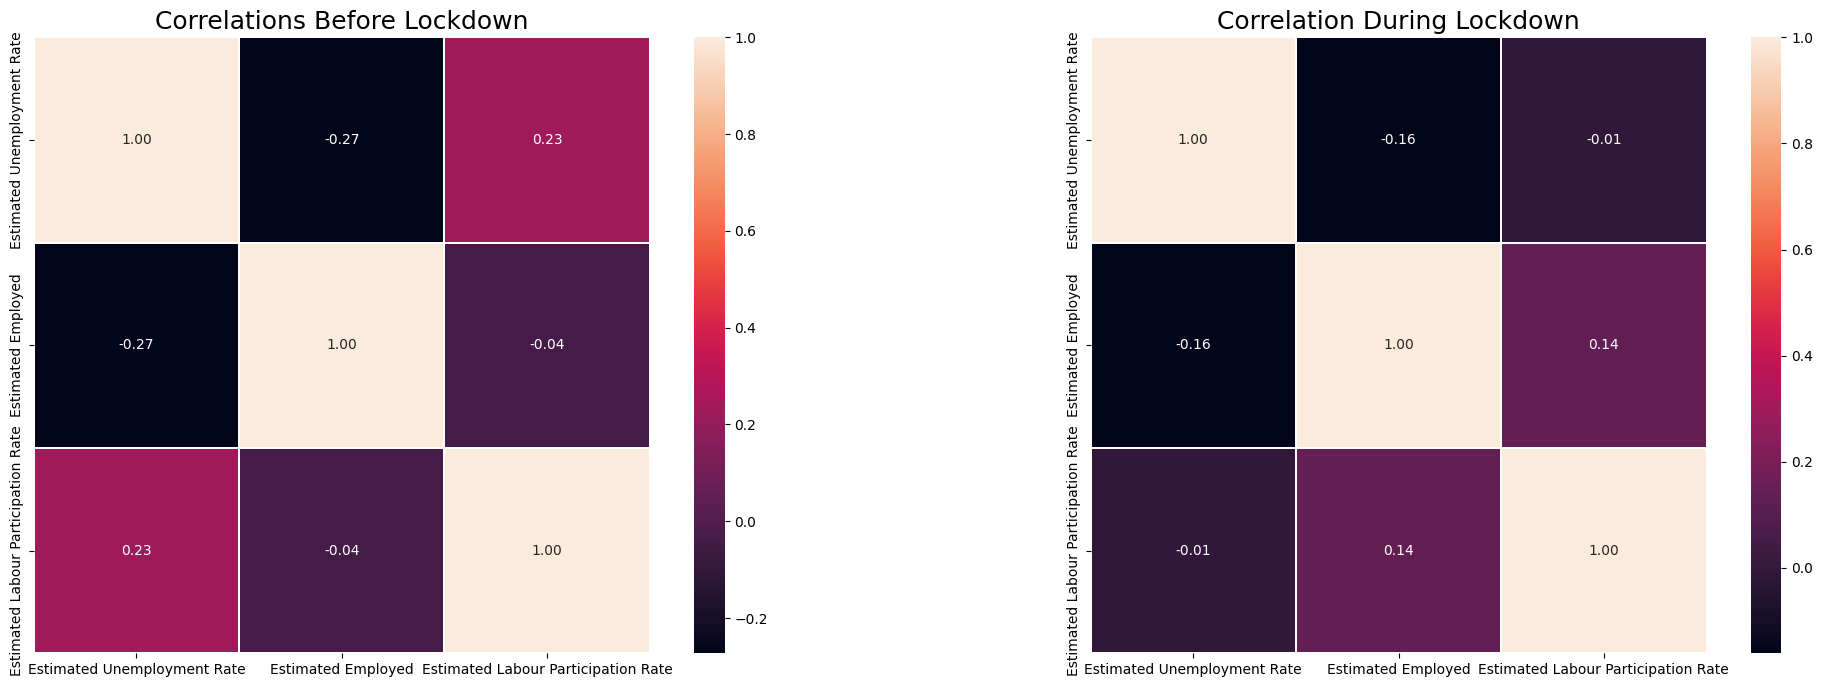

In [ ]:
#correlation heat mab between variables

df = df[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]
df_dl = df_dl[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

plt.figure(figsize=(25, 8))

#plot for correlations of variables brfore lockdown
plt.subplot(1,2,1)

sns.heatmap(df.corr(),annot=True, linewidths=0.1, fmt='.2f', square=True )
#title
plt.title('Correlations Before Lockdown',fontsize=18)


#plot for correlations of variables during lockdown

plt.subplot(1,2,2)
sns.heatmap(df_dl.corr(),annot=True, linewidths=0.1, fmt='.2f', square=True)
#title
plt.title('Correlation During Lockdown',fontsize=18)


plt.show()

### Information found from chart 5

In the above charts shows that Estimated employed and estimated Unemployed varibles are higly correlated both during and before lockdown.

# Gathered Information From Analysis